Loading data...
Lattice size detected: 6 x 6 x 6  (N = 216)
Analysis complete.


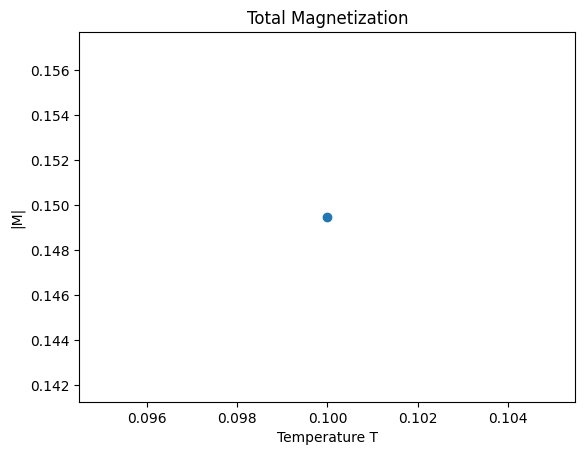

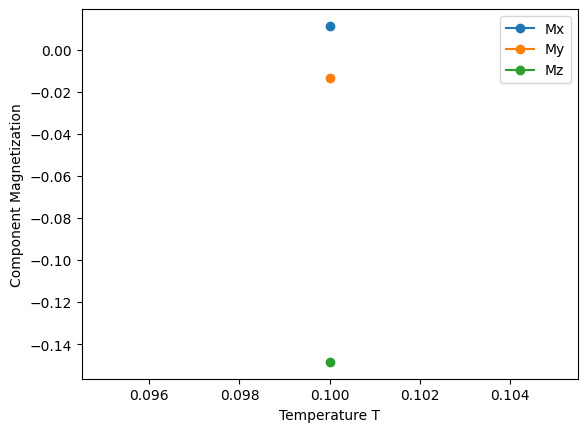

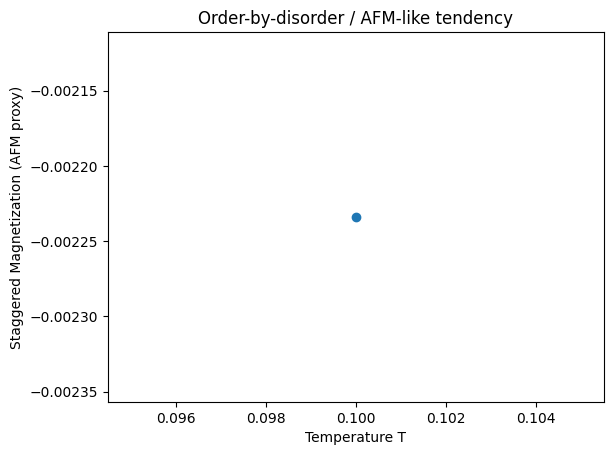

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------- USER INPUT --------
FILE = "spin_config.dat"   # your data file name
lattice_size_known = False # set True if you know Lx,Ly,Lz below

Lx = Ly = Lz = None        # Fill if known, otherwise auto-detected
# ----------------------------

print("Loading data...")
data = np.loadtxt(FILE)

T  = data[:,0]
i  = data[:,1].astype(int)
j  = data[:,2].astype(int)
k  = data[:,3].astype(int)
sx = data[:,4]
sy = data[:,5]
sz = data[:,6]

# Auto-detect lattice size if needed
if not lattice_size_known:
    Lx = i.max()
    Ly = j.max()
    Lz = k.max()

N = Lx * Ly * Lz
print(f"Lattice size detected: {Lx} x {Ly} x {Lz}  (N = {N})")

# Unique temperature points
temps = np.unique(T)

M_tot, Mx, My, Mz = [], [], [], []
Mstag = []   # staggered AFM-like order parameter

for t in temps:
    mask = (T == t)

    sx_t = sx[mask]
    sy_t = sy[mask]
    sz_t = sz[mask]
    i_t  = i[mask]
    j_t  = j[mask]
    k_t  = k[mask]

    # -------- Magnetization --------
    mx = np.mean(sx_t)
    my = np.mean(sy_t)
    mz = np.mean(sz_t)

    m = np.sqrt(mx**2 + my**2 + mz**2)

    Mx.append(mx)
    My.append(my)
    Mz.append(mz)
    M_tot.append(m)

    # -------- Staggered (AFM-like) order --------
    phase = (-1)**(i_t + j_t + k_t)
    mstag = np.mean(phase * sz_t)

    Mstag.append(mstag)

print("Analysis complete.")

# -------- Plotting --------
plt.figure()
plt.plot(temps, M_tot, marker='o')
plt.xlabel("Temperature T")
plt.ylabel("|M|")
plt.title("Total Magnetization")
plt.savefig('M_T.png')

plt.figure()
plt.plot(temps, Mx, marker='o', label="Mx")
plt.plot(temps, My, marker='o', label="My")
plt.plot(temps, Mz, marker='o', label="Mz")
plt.xlabel("Temperature T")
plt.ylabel("Component Magnetization")
plt.legend()
plt.savefig('M_sep.png')

plt.figure()
plt.plot(temps, Mstag, marker='o')
plt.xlabel("Temperature T")
plt.ylabel("Staggered Magnetization (AFM proxy)")
plt.title("Order-by-disorder / AFM-like tendency")
plt.savefig('M_st.png')
plt.show()
